# EDA Inicial

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sellin = pd.read_csv("datasets/sell-in.csv", sep='\t')
productos = pd.read_csv("datasets/tb_productos.csv", sep='\t')
stocks = pd.read_csv("datasets/tb_stocks.csv", sep='\t')

In [15]:
# Verificación inicial
print("Sell-In:", sellin.shape)
print("Productos:", productos.shape)
print("Stocks:", stocks.shape)


Sell-In: (2945818, 7)
Productos: (1262, 6)
Stocks: (13691, 3)


In [22]:
# 3. MERGE INICIAL
df = sellin.merge(productos, on="product_id", how="left")
df = df.merge(stocks, on=["product_id", "periodo"], how="left")

In [23]:
df.shape

(2988650, 13)

In [24]:
2988650 - 2945818

42832

In [18]:
df.isna().sum()

periodo                        0
customer_id                    0
product_id                     0
plan_precios_cuidados          0
cust_request_qty               0
cust_request_tn                0
tn                             0
cat1                        7448
cat2                        7448
cat3                        7448
brand                       7448
sku_size                    7448
stock_final              1839319
dtype: int64

In [26]:
df['periodo'] = pd.to_datetime(df['periodo'].astype(str), format='%Y%m')

In [28]:
# 4. CREACIÓN DE VARIABLES ÚTILES
df['anio'] = df['periodo'].dt.year
df['mes'] = df['periodo'].dt.month
df['anio_mes'] = df['periodo'].dt.to_period('M')

In [29]:
df

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cat1,cat2,cat3,brand,sku_size,stock_final,anio,mes,anio_mes
0,2017-01-01,10234,20524,0,2,0.05300,0.05300,HC,VAJILLA,Cristalino,Importado,500.0,NaN,2017,1,2017-01
1,2017-01-01,10032,20524,0,1,0.13628,0.13628,HC,VAJILLA,Cristalino,Importado,500.0,NaN,2017,1,2017-01
2,2017-01-01,10217,20524,0,1,0.03028,0.03028,HC,VAJILLA,Cristalino,Importado,500.0,NaN,2017,1,2017-01
3,2017-01-01,10125,20524,0,1,0.02271,0.02271,HC,VAJILLA,Cristalino,Importado,500.0,NaN,2017,1,2017-01
4,2017-01-01,10012,20524,0,11,1.54452,1.54452,HC,VAJILLA,Cristalino,Importado,500.0,NaN,2017,1,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988645,2019-12-01,10105,20853,0,1,0.02230,0.02230,PC,CABELLO,Shampoo Bebe,NIVEA,200.0,1.82373,2019,12,2019-12
2988646,2019-12-01,10092,20853,0,1,0.00669,0.00669,PC,CABELLO,Shampoo Bebe,NIVEA,200.0,1.82373,2019,12,2019-12
2988647,2019-12-01,10006,20853,0,7,0.02898,0.02898,PC,CABELLO,Shampoo Bebe,NIVEA,200.0,1.82373,2019,12,2019-12
2988648,2019-12-01,10018,20853,0,4,0.01561,0.01561,PC,CABELLO,Shampoo Bebe,NIVEA,200.0,1.82373,2019,12,2019-12


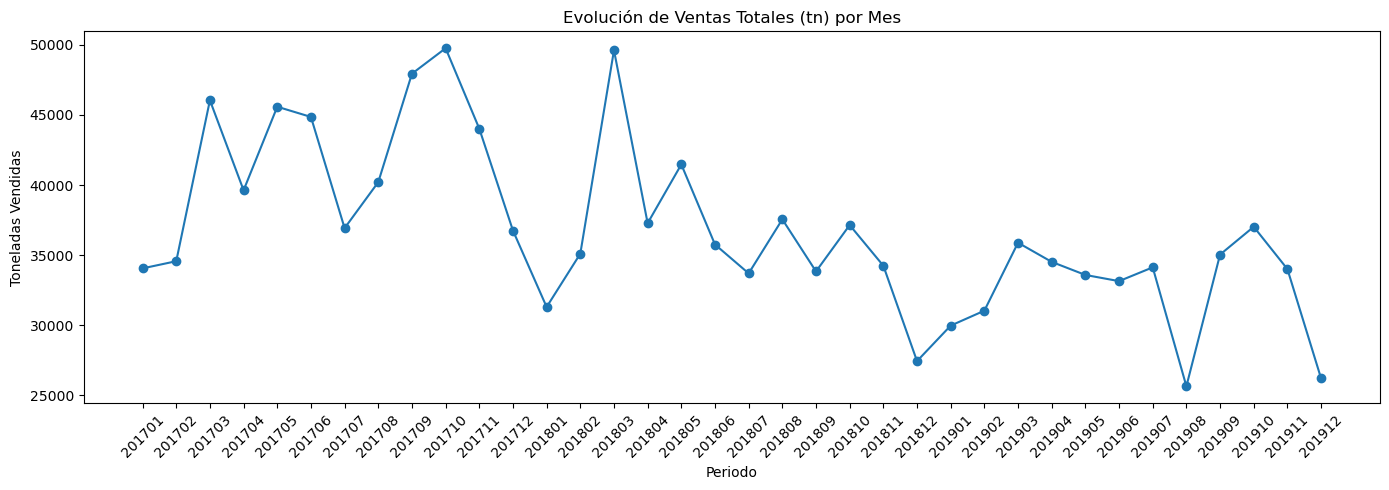

In [21]:
# 5. EXPLORACIÓN GENERAL DE VENTAS
# Configuraciones
# pd.set_option('display.max_columns', None)
# plt.style.use('ggplot')
ventas_mensuales = sellin.groupby('periodo')['tn'].sum().reset_index()

plt.figure(figsize=(14, 5))
plt.plot(ventas_mensuales['periodo'].astype(str), ventas_mensuales['tn'], marker='o')
plt.title("Evolución de Ventas Totales (tn) por Mes")
plt.xlabel("Periodo")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

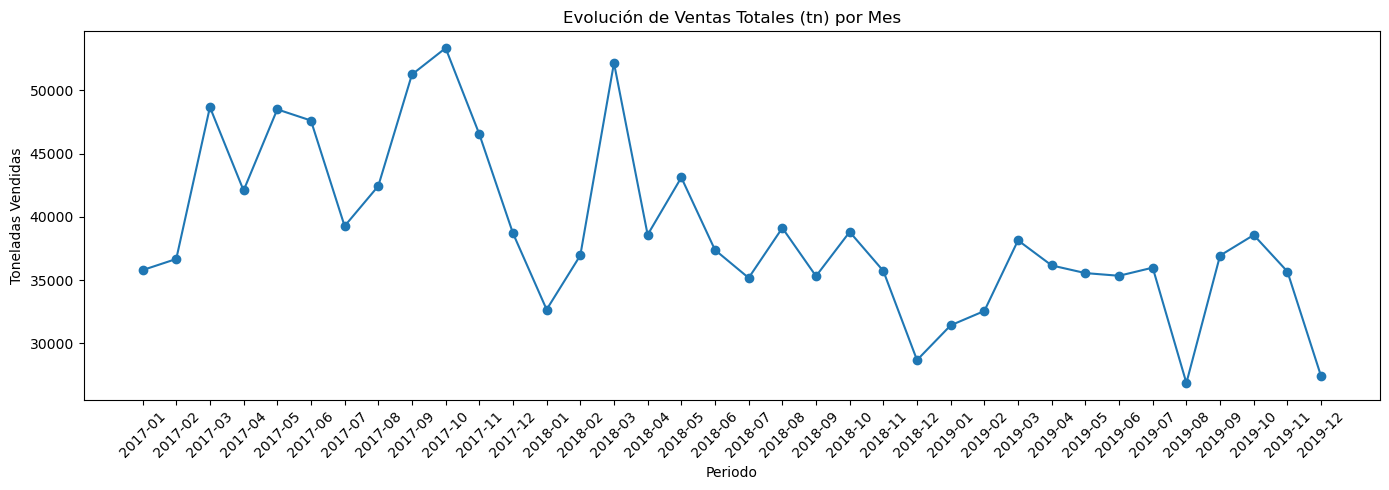

In [30]:
# 5. EXPLORACIÓN GENERAL DE VENTAS
# Configuraciones
# pd.set_option('display.max_columns', None)
# plt.style.use('ggplot')
ventas_mensuales = df.groupby('anio_mes')['tn'].sum().reset_index()

plt.figure(figsize=(14, 5))
plt.plot(ventas_mensuales['anio_mes'].astype(str), ventas_mensuales['tn'], marker='o')
plt.title("Evolución de Ventas Totales (tn) por Mes")
plt.xlabel("Periodo")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
df.groupby(['anio_mes', 'cat1'])['tn'].sum().reset_index()

,anio_mes,cat1,tn
0,2017-01,FOODS,6826.16102
1,2017-01,HC,21686.66308
2,2017-01,PC,7197.38367
3,2017-01,REF,8.98416
4,2017-02,FOODS,7730.78454
...,...,...,...
139,2019-11,REF,0.47064
140,2019-12,FOODS,5015.76275
141,2019-12,HC,17085.91021
142,2019-12,PC,5292.02777


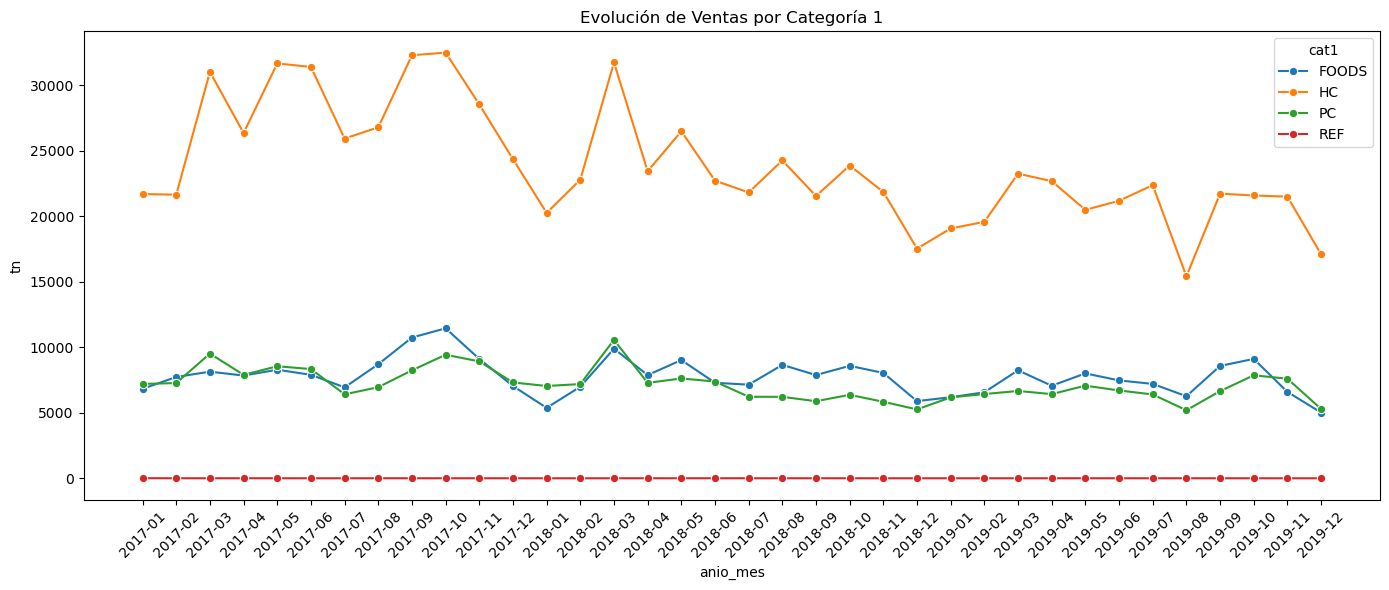

In [ ]:
# 6. ANÁLISIS POR CATEGORÍA 1
cat_ventas = df.groupby(['anio_mes', 'cat1'])['tn'].sum().reset_index()
cat_ventas['anio_mes'] = cat_ventas['anio_mes'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=cat_ventas, x='anio_mes', y='tn', hue='cat1', marker='o')
plt.title("Evolución de Ventas por Categoría 1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
df['anio_mes']

0          2017-01
1          2017-01
2          2017-01
3          2017-01
4          2017-01
            ...   
2988645    2019-12
2988646    2019-12
2988647    2019-12
2988648    2019-12
2988649    2019-12
Name: anio_mes, Length: 2988650, dtype: period[M]

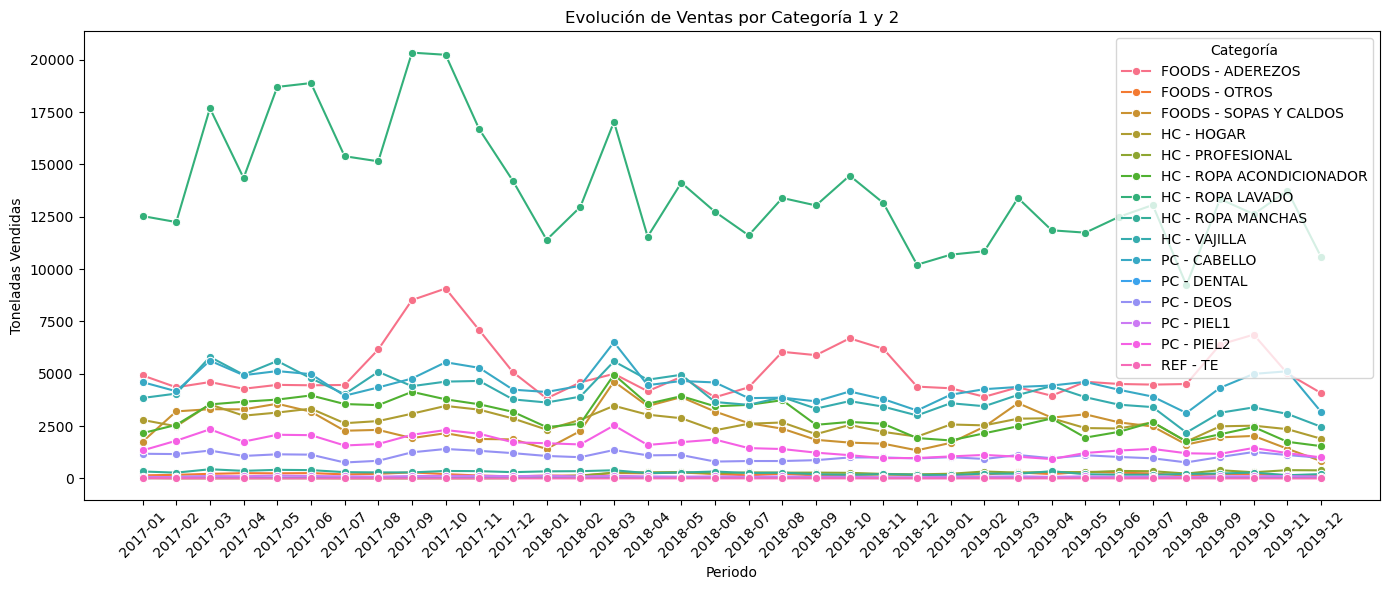

In [48]:
# 6. ANÁLISIS POR CATEGORÍA 2
# Asegurar que 'anio_mes' esté en formato datetime para que se pueda graficar correctamente
# df['anio_mes'] = pd.to_datetime(df['periodo'].astype(str), format='%Y%m')
# df['anio_mes'] = df['anio_mes'].dt.to_period('M').dt.to_timestamp()

# Agrupar por anio_mes, cat1 y cat2, sumando toneladas
ventas_cat = df.groupby(['anio_mes', 'cat1', 'cat2'])['tn'].sum().reset_index()
ventas_cat['anio_mes'] = ventas_cat['anio_mes'].astype(str)
# Crear una columna combinada para mejor visualización
ventas_cat['cat1_cat2'] = ventas_cat['cat1'].astype(str) + " - " + ventas_cat['cat2'].astype(str)

# Plot con seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=ventas_cat, x='anio_mes', y='tn', hue='cat1_cat2', marker='o')
plt.title("Evolución de Ventas por Categoría 1 y 2")
plt.xlabel("Periodo")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=45)
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

In [ ]:
# 6. ANÁLISIS POR CATEGORÍA 2
# Asegurar que 'anio_mes' esté en formato datetime para que se pueda graficar correctamente
# df['anio_mes'] = pd.to_datetime(df['periodo'].astype(str), format='%Y%m')
# df['anio_mes'] = df['anio_mes'].dt.to_period('M').dt.to_timestamp()

# Agrupar por anio_mes, cat1 y cat2, sumando toneladas
ventas_cat = df.groupby(['anio_mes', 'cat1', 'cat2'])['tn'].sum().reset_index()
ventas_cat['anio_mes'] = ventas_cat['anio_mes'].astype(str)
# Crear una columna combinada para mejor visualización
ventas_cat['cat1_cat2'] = ventas_cat['cat1'].astype(str) + " - " + ventas_cat['cat2'].astype(str)

# Plot con seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=ventas_cat, x='anio_mes', y='tn', hue='cat1_cat2', marker='o')
plt.title("Evolución de Ventas por Categoría 1 y 2")
plt.xlabel("Periodo")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=45)
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

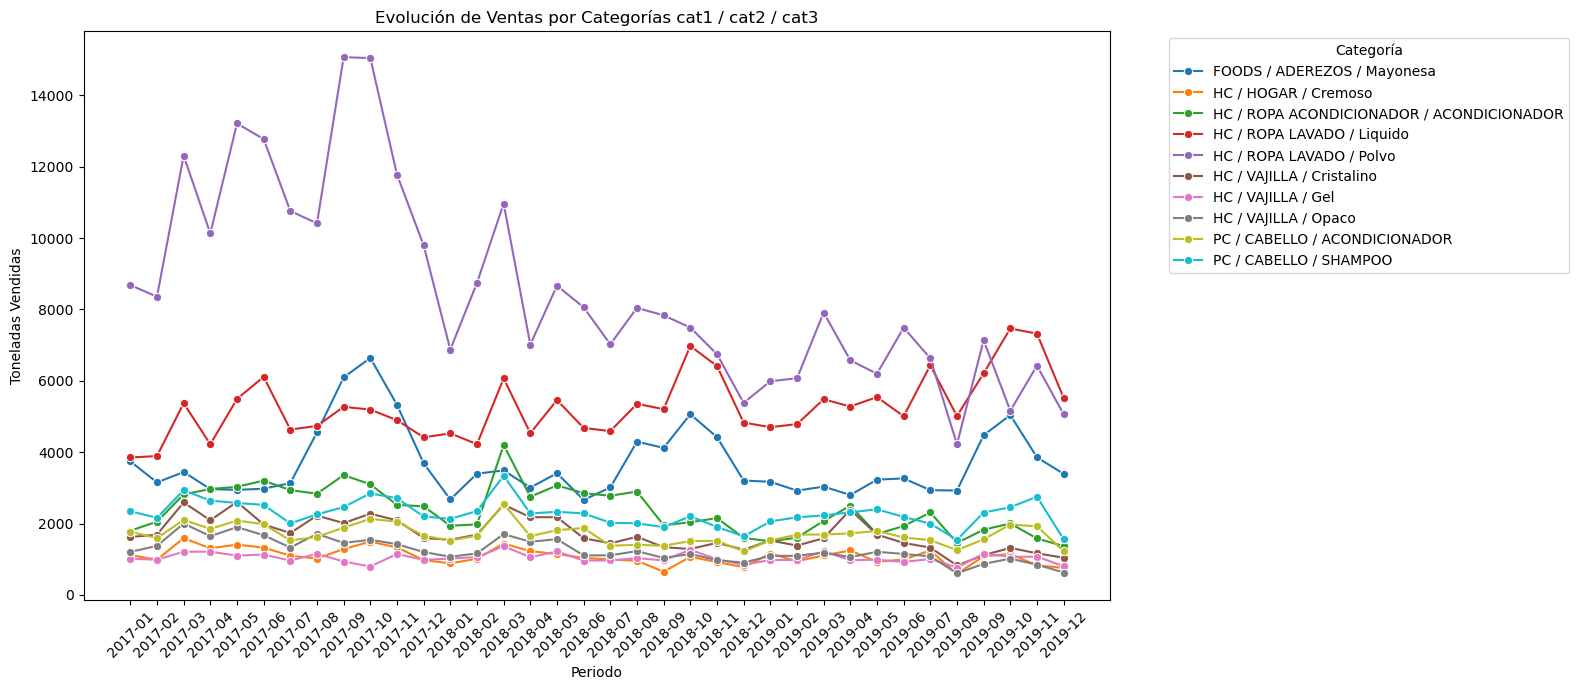

In [49]:
# Asegurar que anio_mes esté en datetime

df['anio_mes'] = df['anio_mes'].astype(str)


# Agrupar
ventas_categorias = df.groupby(['anio_mes', 'cat1', 'cat2', 'cat3'])['tn'].sum().reset_index()

# Crear columna combinada para graficar
ventas_categorias['categoria_completa'] = (
    ventas_categorias['cat1'].astype(str) + " / " +
    ventas_categorias['cat2'].astype(str) + " / " +
    ventas_categorias['cat3'].astype(str)
)

# Como hay muchas combinaciones, filtramos

top_categorias = (
    ventas_categorias.groupby('categoria_completa')['tn']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

ventas_top = ventas_categorias[ventas_categorias['categoria_completa'].isin(top_categorias)]

plt.figure(figsize=(16, 7))
sns.lineplot(data=ventas_top, x='anio_mes', y='tn', hue='categoria_completa', marker='o')
plt.title("Evolución de Ventas por Categorías cat1 / cat2 / cat3")
plt.xlabel("Periodo")
plt.ylabel("Toneladas Vendidas")
plt.xticks(rotation=45)
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


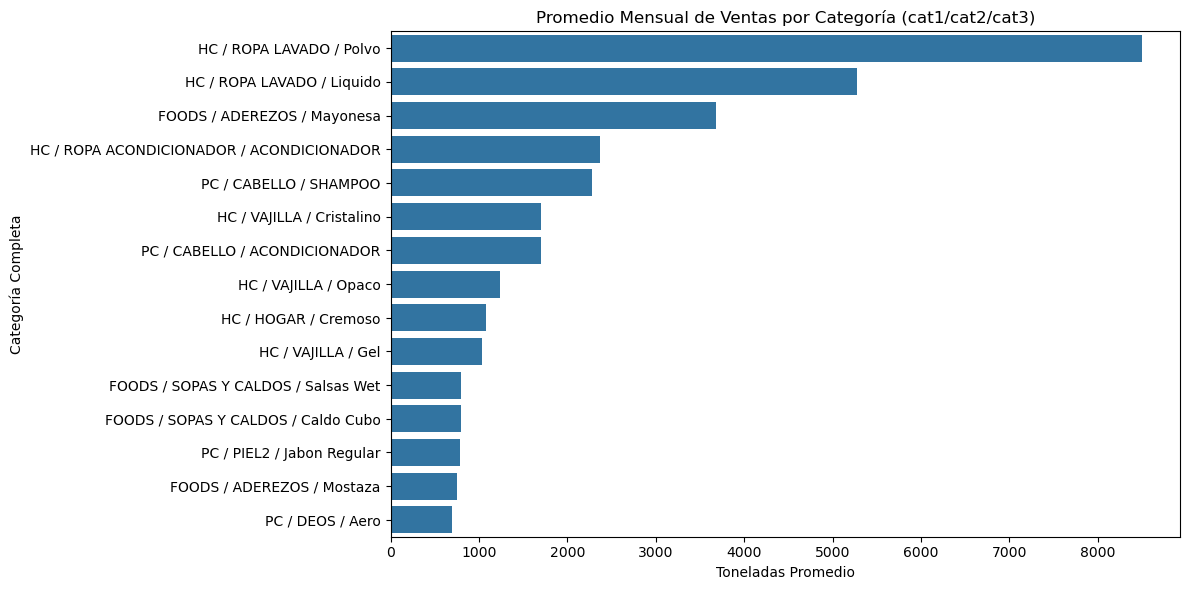

In [50]:
# Distribucion promedio por categoria completa
ventas_avg = (
    ventas_categorias
    .groupby('categoria_completa')['tn']
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=ventas_avg.values, y=ventas_avg.index)
plt.title("Promedio Mensual de Ventas por Categoría (cat1/cat2/cat3)")
plt.xlabel("Toneladas Promedio")
plt.ylabel("Categoría Completa")
plt.tight_layout()
plt.show()


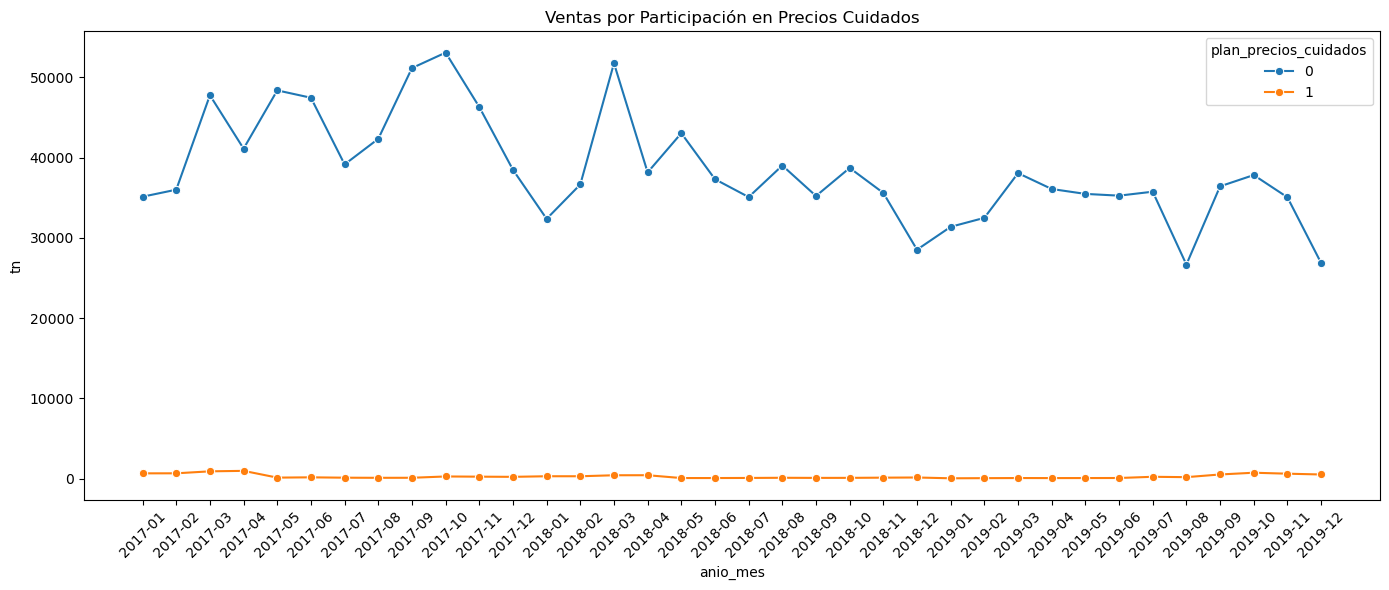

In [34]:
# 7. IMPACTO DE PRECIOS CUIDADOS
pc_impacto = df.groupby(['anio_mes', 'plan_precios_cuidados'])['tn'].sum().reset_index()
pc_impacto['anio_mes'] = pc_impacto['anio_mes'].astype(str)
plt.figure(figsize=(14, 6))
sns.lineplot(data=pc_impacto, x='anio_mes', y='tn', hue='plan_precios_cuidados', marker='o')
plt.title("Ventas por Participación en Precios Cuidados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

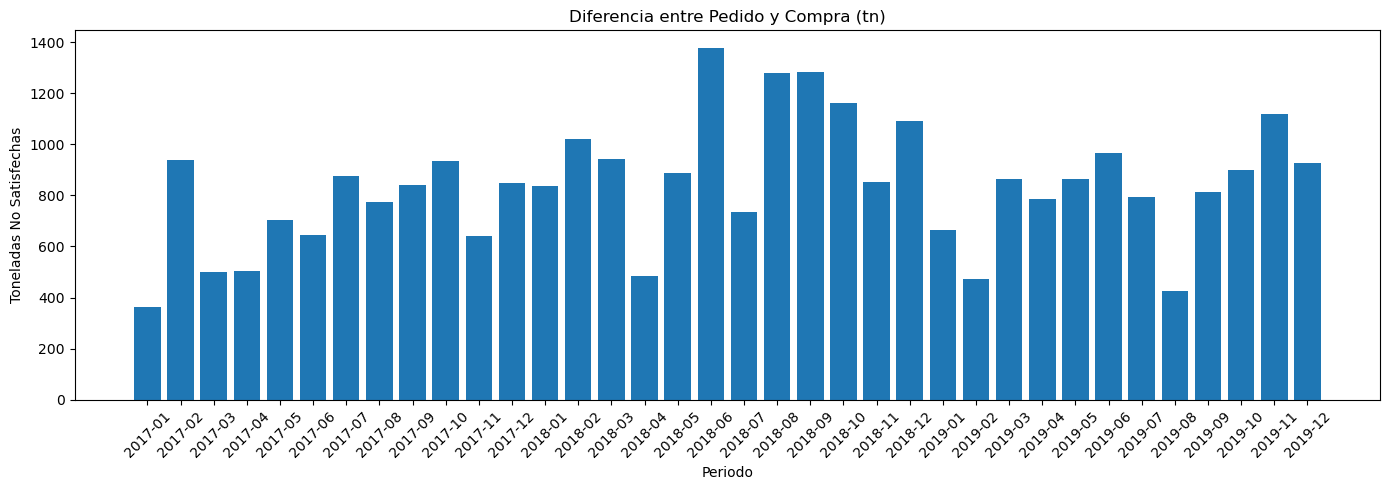

In [35]:
# 8. DIFERENCIA ENTRE PEDIDO Y COMPRA
df['tn_gap'] = df['cust_request_tn'] - df['tn']

gap_mensual = df.groupby('anio_mes')['tn_gap'].sum().reset_index()
gap_mensual['anio_mes'] = gap_mensual['anio_mes'].astype(str)

plt.figure(figsize=(14, 5))
plt.bar(gap_mensual['anio_mes'].astype(str), gap_mensual['tn_gap'])
plt.title("Diferencia entre Pedido y Compra (tn)")
plt.xlabel("Periodo")
plt.ylabel("Toneladas No Satisfechas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

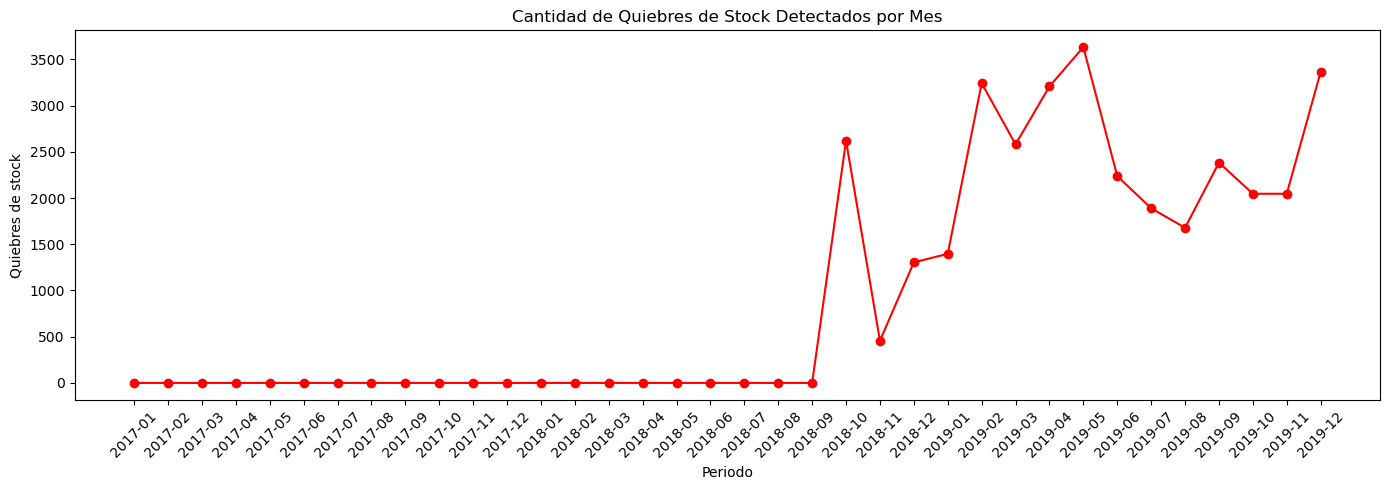

In [36]:
# 9. ANÁLISIS DE STOCKS
df['quiebre_stock'] = np.where((df['cust_request_tn'] > 0) & (df['stock_final'] == 0), 1, 0)
quiebres = df.groupby('anio_mes')['quiebre_stock'].sum().reset_index()

quiebres['anio_mes'] = quiebres['anio_mes'].astype(str)

plt.figure(figsize=(14, 5))
plt.plot(quiebres['anio_mes'].astype(str), quiebres['quiebre_stock'], marker='o', color='red')
plt.title("Cantidad de Quiebres de Stock Detectados por Mes")
plt.xlabel("Periodo")
plt.ylabel("Quiebres de stock")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 10. TOP PRODUCTOS MAS VENDIDOS
top_productos = df.groupby('product_id')['tn'].sum().sort_values(ascending=False).head(10).reset_index()
top_productos = top_productos.merge(productos, on='product_id', how='left')

In [38]:
print("Top 10 productos más vendidos:")
display(top_productos[['product_id', 'brand', 'cat1', 'cat2', 'tn']])

Top 10 productos más vendidos:


,product_id,brand,cat1,cat2,tn
0,20001,ARIEL,HC,ROPA LAVADO,50340.39558
1,20010,LIMPIEX,HC,ROPA LAVADO,37342.15836
2,20010,LIMPIEX,HC,ROPA LAVADO,37342.15836
3,20002,LIMPIEX,HC,ROPA LAVADO,36337.25439
4,20003,NATURA,FOODS,ADEREZOS,32004.15274
5,20021,LIMPIEX,HC,ROPA LAVADO,25003.78252
6,20021,LIMPIEX,HC,ROPA LAVADO,25003.78252
7,20020,LIMPIEX,HC,ROPA LAVADO,24516.78008
8,20020,LIMPIEX,HC,ROPA LAVADO,24516.78008
9,20004,NATURA,FOODS,ADEREZOS,24178.15379


In [41]:
# 10. TOP PRODUCTOS menos VENDIDOS
df_aux = df.copy()
df_aux.dropna(inplace=True)
top_productos = df.groupby('product_id')['tn'].sum().sort_values(ascending=True).head(10).reset_index()
top_productos = top_productos.merge(productos, on='product_id', how='left')

In [42]:
print("Top 10 productos más vendidos:")
display(top_productos[['product_id', 'brand', 'cat1', 'cat2', 'tn']])

Top 10 productos más vendidos:


,product_id,brand,cat1,cat2,tn
0,21299,NaN,NaN,NaN,0.00546
1,21298,NaN,NaN,NaN,0.00573
2,21297,NaN,NaN,NaN,0.00579
3,21296,NaN,NaN,NaN,0.00651
4,21295,NaN,NaN,NaN,0.00699
5,21294,NIVEA,PC,CABELLO,0.00764
6,21293,NaN,NaN,NaN,0.00917
7,21292,NaN,NaN,NaN,0.00983
8,21291,NaN,NaN,NaN,0.01092
9,21290,NaN,NaN,NaN,0.01174


In [51]:
import streamlit as st

# EDA al grano

🎯 Objetivo:

Analizar productos individualmente para entender:

    Su evolución temporal

    Comparación entre lo pedido y lo efectivamente comprado

    Relación con stock disponible

    Participación en programas como Precios Cuidados

    Estacionalidad y consistencia de ventas

In [ ]:
producto_objetivo = 20001
df_producto = df[df['product_id'] == producto_objetivo].copy()

In [52]:
# Contar cantidad de meses con ventas por producto
historial = df[df['tn'] > 0].groupby('product_id')['anio_mes'].nunique().reset_index()
historial.columns = ['product_id', 'meses_con_ventas']

# Filtrar productos con más de 12 meses de ventas
productos_estables = historial[historial['meses_con_ventas'] >= 12]['product_id'].tolist()

print(f"Se encontraron {len(productos_estables)} productos con al menos 12 meses de ventas.")


Se encontraron 961 productos con al menos 12 meses de ventas.


In [53]:
def plot_producto(product_id):
    df_prod = df[df['product_id'] == product_id].sort_values('anio_mes')
    
    fig, ax1 = plt.subplots(figsize=(14, 6))

    sns.lineplot(data=df_prod, x='anio_mes', y='tn', label='Ventas (tn)', ax=ax1, marker='o')
    sns.lineplot(data=df_prod, x='anio_mes', y='cust_request_tn', label='Pedidos (tn)', ax=ax1, marker='x')
    ax1.set_title(f"Evolución del Producto ID {product_id}")
    ax1.set_xlabel("Mes")
    ax1.set_ylabel("Toneladas")
    ax1.tick_params(axis='x', rotation=45)

    ax2 = ax1.twinx()
    sns.barplot(data=df_prod, x='anio_mes', y='stock_final', color='gray', alpha=0.3, ax=ax2)
    ax2.set_ylabel("Stock Final")
    ax2.grid(False)

    fig.tight_layout()
    plt.show()


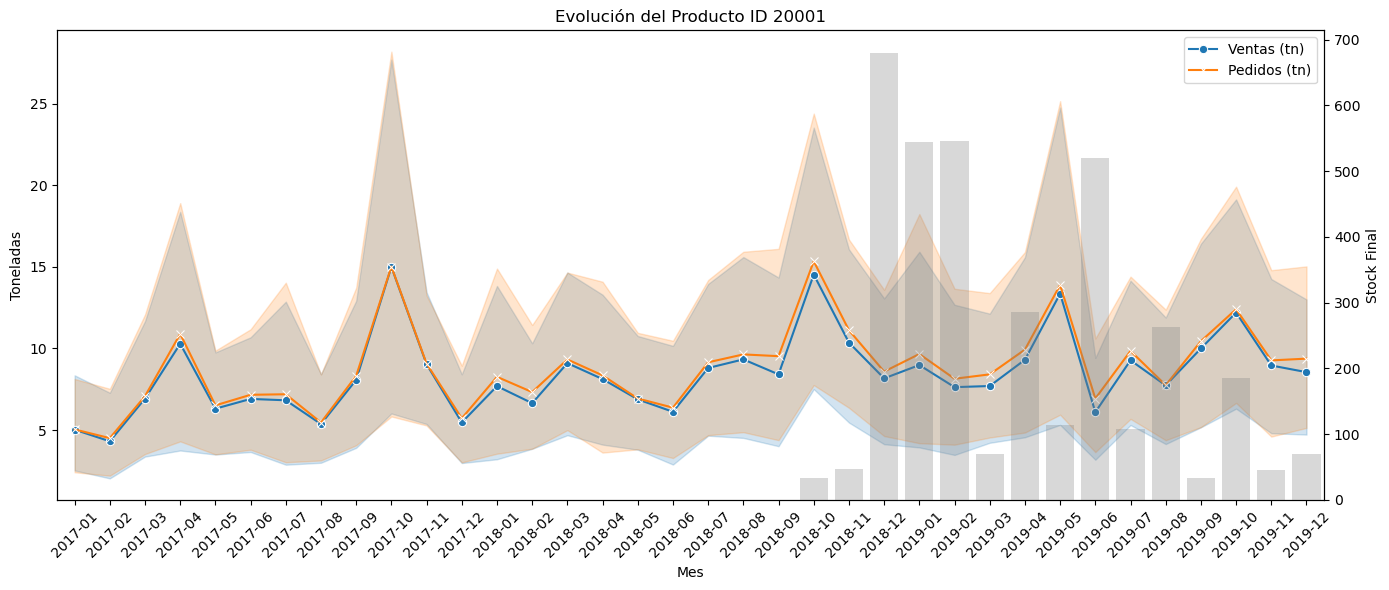

In [54]:
# Elegir uno de los productos estables
ejemplo = productos_estables[0]
plot_producto(ejemplo)

--- Producto: 20001 ---


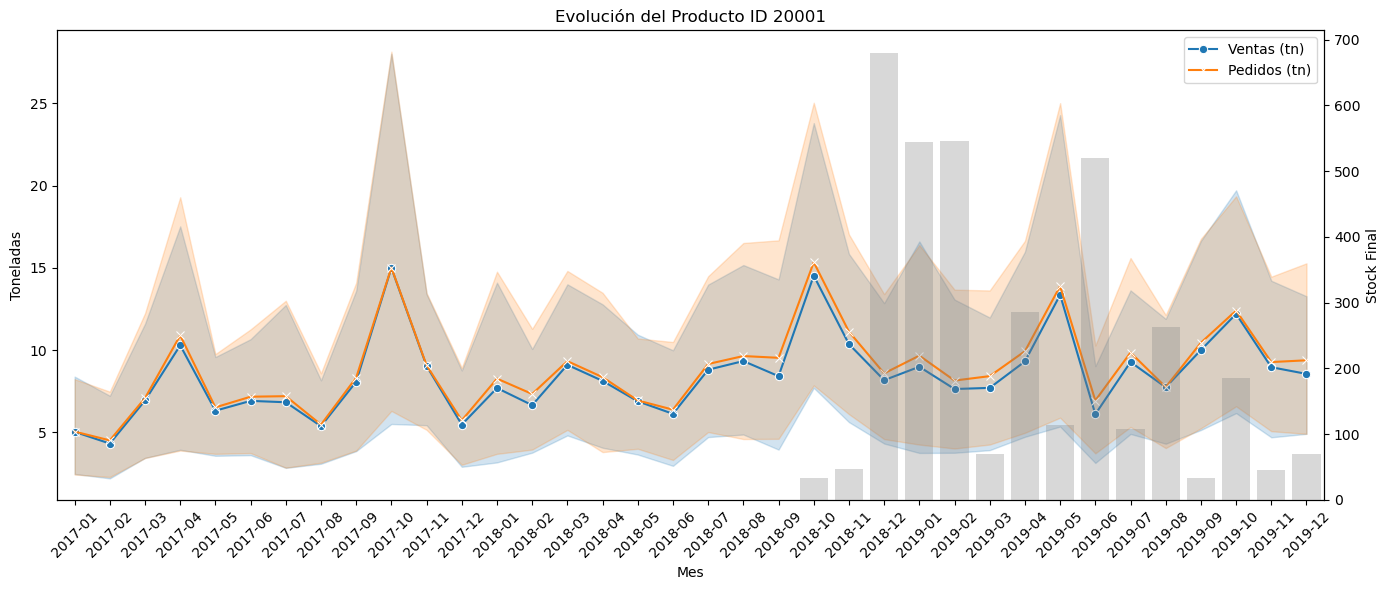

--- Producto: 20002 ---


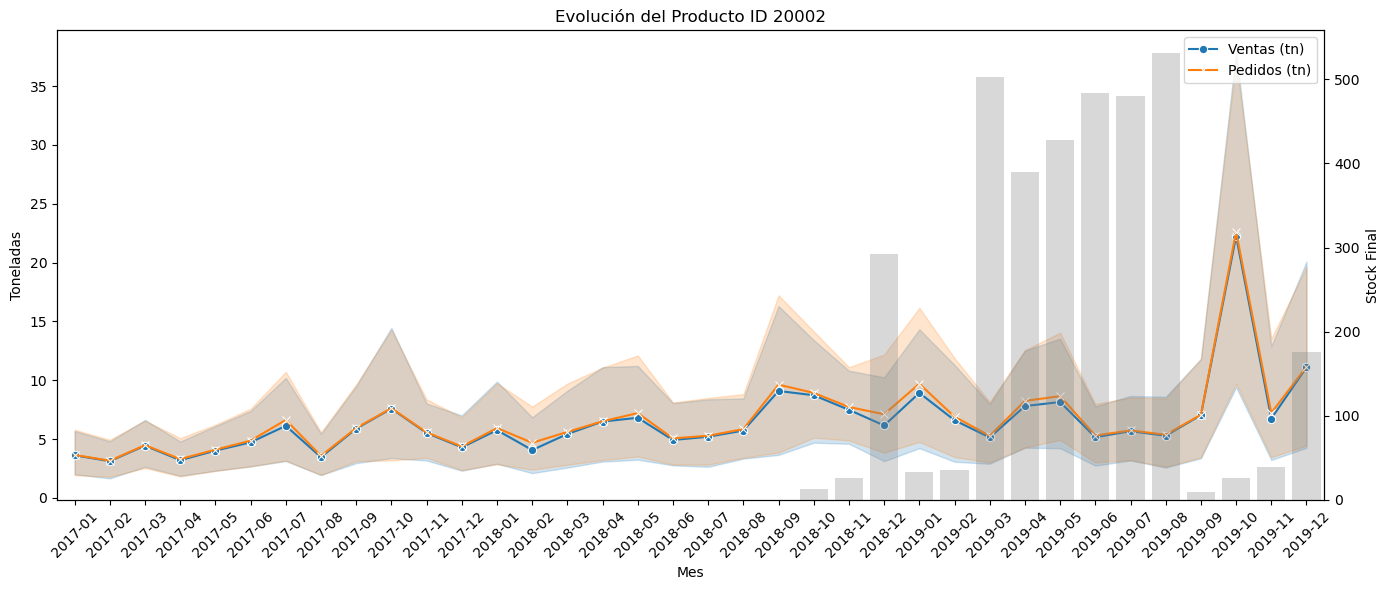

--- Producto: 20003 ---


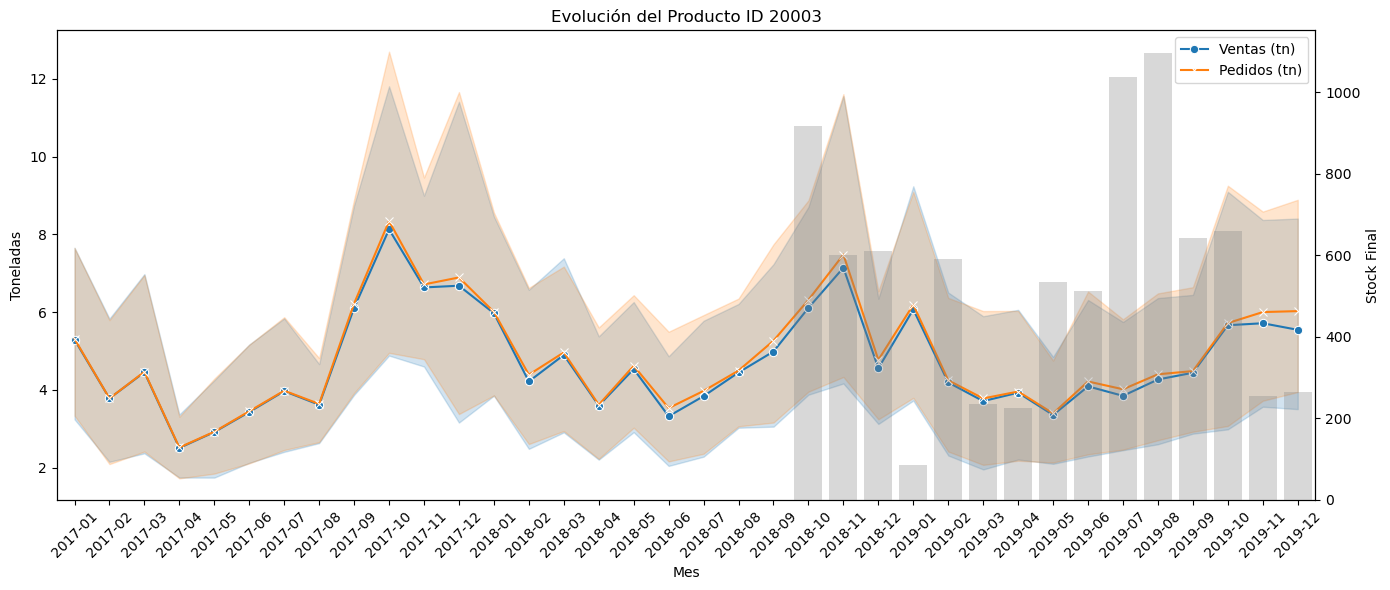

--- Producto: 20004 ---


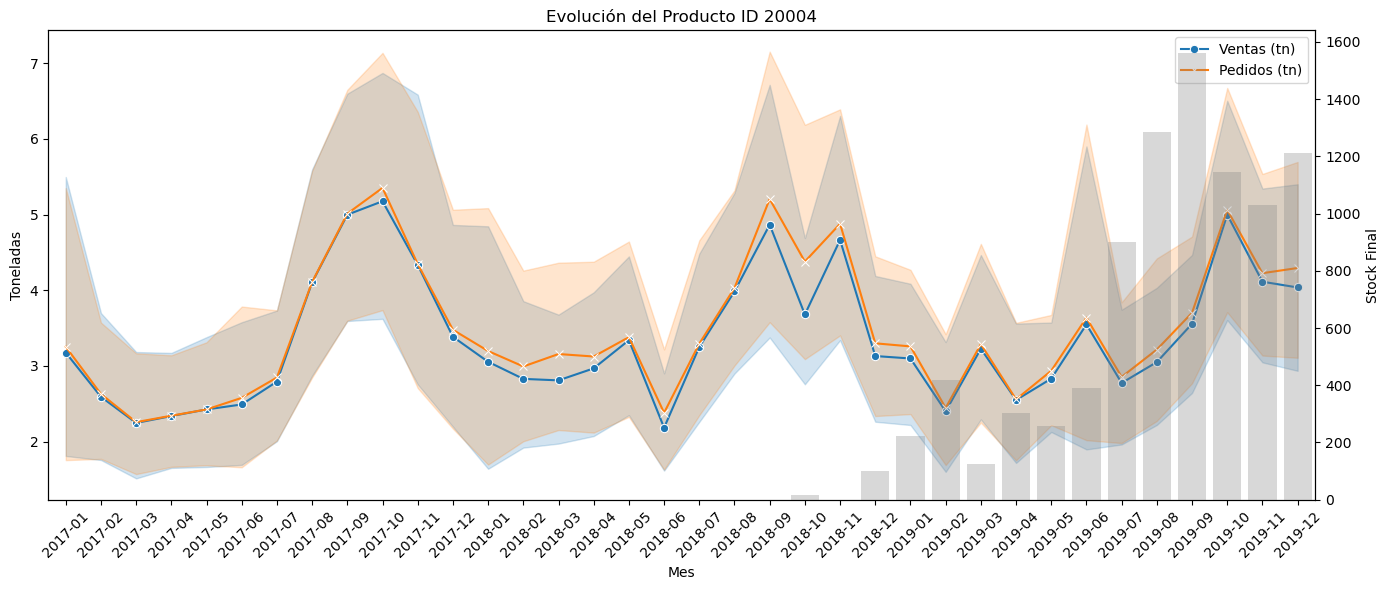

--- Producto: 20005 ---


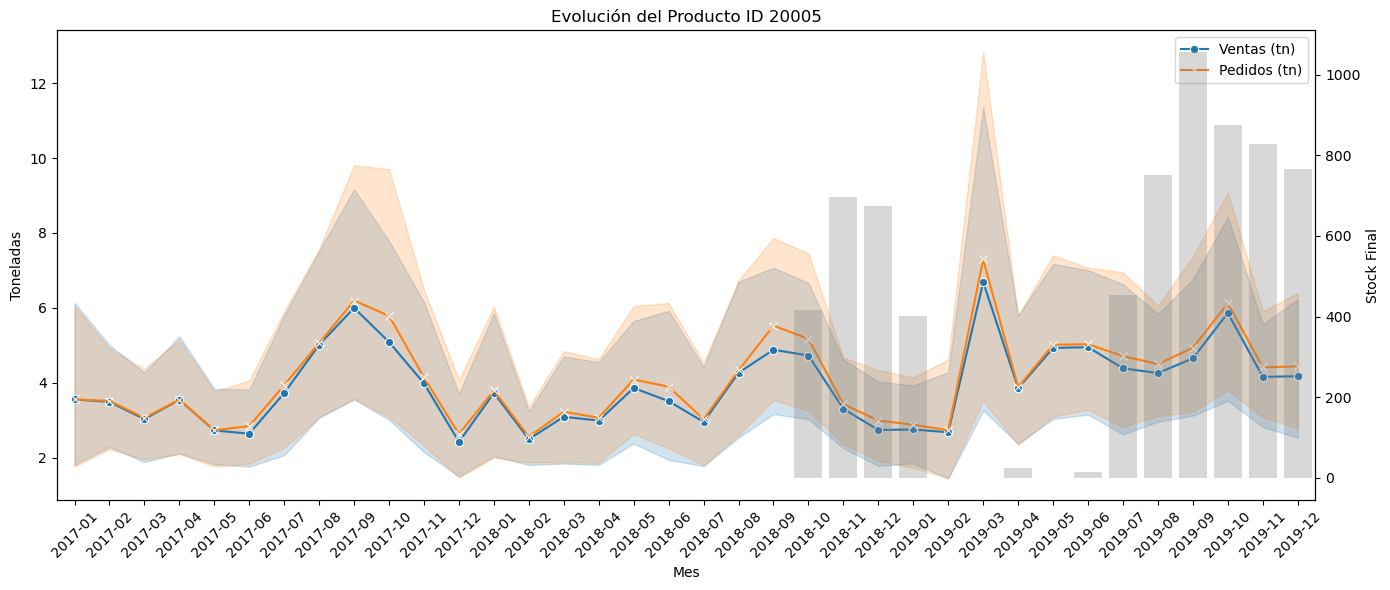

In [55]:
for pid in productos_estables[:5]:
    print(f"--- Producto: {pid} ---")
    plot_producto(pid)